In [5]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [7]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

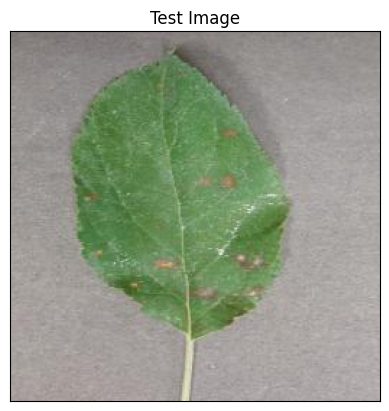

In [8]:
import cv2
image_path = 'test/test/1.JPG'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) 
predictions = cnn.predict(input_arr)

1/1 [==============================] - 7s 7s/step


In [10]:
print(predictions)

[[6.8937907e-17 1.6824896e-16 1.0000000e+00 1.3799056e-20 2.7545108e-17
  2.9950031e-14 3.7108113e-19 8.1910959e-20 5.7043206e-27 1.4495190e-21
  1.8159490e-28 5.5794534e-20 8.7487451e-24 6.0769715e-26 2.2685194e-20
  1.7231772e-16 1.1194753e-18 1.4590938e-22 7.7489975e-19 4.9382780e-20
  3.3396277e-24 7.3292352e-22 2.6543251e-19 3.9115974e-21 4.5397434e-23
  2.9639586e-21 2.6313091e-19 1.2873602e-23 6.5468400e-15 3.8344206e-20
  5.8383800e-16 3.7126663e-19 6.8530518e-15 1.6959092e-19 1.6498609e-14
  2.1518281e-18 2.7852446e-19 1.3336925e-17]]


In [11]:
result_index = np.argmax(predictions)
print(result_index)

2


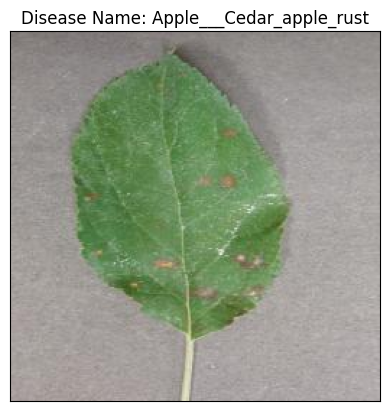

In [12]:

model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()